In [ ]:
!pip install catboost

     |████████████████████████████████| 65.7MB 77kB/s 


In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
import multiprocessing
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from datetime import datetime
from sklearn.metrics import make_scorer, accuracy_score

from catboost import CatBoostRegressor, Pool

import xgboost as xgb

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

from sklearn.ensemble import VotingRegressor

# Plot
# ==============================================================================

from xgboost import plot_tree


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

# Descarga del target
# ==============================================================================
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Primer DataFrame

In [ ]:
DataFrame2 = pd.read_csv('/content/short_df_Encoded.csv')

In [ ]:
DataFrame2.head()

Unnamed: 0  Region_APAC  ...  Pricing, Delivery_Terms_Quote_Appr  Decision
0           0          0.0  ...                                 1.0       0.0
1           1          0.0  ...                                 0.0       1.0
2           2          0.0  ...                                 0.0       1.0
3           3          0.0  ...                                 1.0       0.0
4           4          0.0  ...                                 1.0       0.0

[5 rows x 11 columns]

In [ ]:
DataFrame2.drop(columns = {'Unnamed: 0'}, inplace = True)

In [ ]:
DataFrame2.head()

Region_APAC  Region_Americas  ...  Pricing, Delivery_Terms_Quote_Appr  Decision
0          0.0              0.0  ...                                 1.0       0.0
1          0.0              0.0  ...                                 0.0       1.0
2          0.0              1.0  ...                                 0.0       1.0
3          0.0              1.0  ...                                 1.0       0.0
4          0.0              1.0  ...                                 1.0       0.0

[5 rows x 10 columns]

In [ ]:
DataFrame2Train = DataFrame2.loc[:,DataFrame2.columns != 'Decision']

In [ ]:
DataFrame2Test  =  DataFrame2.loc[:,'Decision']

In [ ]:
DataFrame2Train.shape, DataFrame2Test.shape, DataFrame2.shape

((16772, 9), (16772,), (16772, 10))

##LightGBM


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(DataFrame2Train,DataFrame2Test,test_size = 0.2, random_state = 0)

In [ ]:
model = LGBMRegressor(boosting_type = "goss", n_estimators = 1100, learning_rate = 0.008, random_state = 123)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
preds = model.predict(x_test)

In [ ]:
loss = log_loss(y_test, preds)
loss

In [ ]:
#val = model.feature_importances_

In [ ]:
#df = pd.DataFrame(val)

In [ ]:
#df.columns = ["Value"]
#df.sort_values(by = "Value").plot.bar()

##Catboost

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(DataFrame2Train,DataFrame2Test,test_size = 0.2, random_state = 0)

In [ ]:
modelCatReg1 = CatBoostRegressor(num_boost_round = 1500, learning_rate = 0.007)

#Entreno al modelo
modelCatReg1.fit(x_train2, y_train2)
#Predicciones
preds_CatReg = modelCatReg1.predict(x_test2)
print("CatReg = ", preds_CatReg)

0:	learn: 0.4939131	total: 51.5ms	remaining: 1m 17s
1:	learn: 0.4927485	total: 54.4ms	remaining: 40.7s
2:	learn: 0.4915755	total: 57ms	remaining: 28.5s
3:	learn: 0.4904074	total: 59.7ms	remaining: 22.3s
4:	learn: 0.4892143	total: 62.3ms	remaining: 18.6s
5:	learn: 0.4880268	total: 64.9ms	remaining: 16.2s
6:	learn: 0.4868536	total: 67.5ms	remaining: 14.4s
7:	learn: 0.4857370	total: 70ms	remaining: 13.1s
8:	learn: 0.4846057	total: 72.5ms	remaining: 12s
9:	learn: 0.4834679	total: 75.1ms	remaining: 11.2s
10:	learn: 0.4823718	total: 77.7ms	remaining: 10.5s
11:	learn: 0.4812722	total: 80.3ms	remaining: 9.95s
12:	learn: 0.4801667	total: 82.9ms	remaining: 9.49s
13:	learn: 0.4790675	total: 85.5ms	remaining: 9.08s
14:	learn: 0.4779984	total: 88.1ms	remaining: 8.72s
15:	learn: 0.4769706	total: 90.6ms	remaining: 8.4s
16:	learn: 0.4759180	total: 93.2ms	remaining: 8.13s
17:	learn: 0.4748625	total: 95.8ms	remaining: 7.89s
18:	learn: 0.4738212	total: 98.7ms	remaining: 7.69s
19:	learn: 0.4728012	total: 

In [ ]:
#Error del modelo
rmse1 = np.sqrt(mean_squared_error(y_test2, preds_CatReg))
print("RMSE: %f" % (rmse1))

RMSE: 0.375398


In [ ]:
accuracy1 = accuracy_score(y_test2, preds_CatReg.round().astype('int'))
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 79.73%


In [ ]:
lossCat = log_loss(y_test2, preds_CatReg)
lossCat

0.43018030392205603

##Xgboost

In [ ]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(DataFrame2Train,DataFrame2Test,test_size = 0.2, random_state = 0)

In [ ]:
xg_Regressor1 = xgb.XGBRegressor(objective ='reg:squarederror',colsample_bytree= 0.8, gamma= 1.5, learning_rate= 0.01, max_depth= 20, min_child_weight= 1, n_estimators= 200, subsample= 0.8)

In [ ]:
xg_Regressor1.fit(x_train5,y_train5)

In [ ]:
predsRegressor1 = xg_Regressor1.predict(x_test5)

In [ ]:
value_pred_Regressor1 = pd.DataFrame()
value_pred_Regressor1['pred'] = predsRegressor1
value_pred_Regressor1['pred'].value_counts()

In [ ]:
rmseRegressor1 = np.sqrt(mean_squared_error(y_test5, predsRegressor1))
print("RMSE: %f" % (rmseRegressor1))

In [ ]:
lossRegressor1 = log_loss(y_test5, predsRegressor1)
print(f"Log Loss is {lossRegressor1}")

#Segundo DataFrame


In [ ]:
DataFrame3 = pd.read_csv('/content/DataFrame_train_encoded1.csv')

In [ ]:
DataFrame3.head()

Unnamed: 0  Total_Amount  ...  Region_Apac  Region_Middle_East
0           0     15.635076  ...            0                   0
1           1     10.940740  ...            0                   0
2           2     11.336971  ...            0                   0
3           3     15.819943  ...            0                   0
4           4     16.407566  ...            0                   0

[5 rows x 15 columns]

In [ ]:
DataFrame3.drop(columns = {'Unnamed: 0'}, inplace = True)

In [ ]:
DataFrame3.head()

Total_Amount  Delivery_Year  ...  Region_Apac  Region_Middle_East
0     15.635076           2016  ...            0                   0
1     10.940740           2016  ...            0                   0
2     11.336971           2016  ...            0                   0
3     15.819943           2018  ...            0                   0
4     16.407566           2018  ...            0                   0

[5 rows x 14 columns]

In [ ]:
DataFrame3Train = DataFrame3.loc[:,DataFrame3.columns != 'Decision']

In [ ]:
DataFrame3Test  =  DataFrame3.loc[:,'Decision']

In [ ]:
DataFrame3Train.shape, DataFrame3Test.shape, DataFrame3.shape

((16772, 13), (16772,), (16772, 14))

##LightGBM

In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(DataFrame3Train,DataFrame3Test,test_size = 0.2, random_state = 0)

In [ ]:
modelLGBMReg2 = LGBMRegressor(boosting_type = "goss", n_estimators = 400, learning_rate = 0.001, random_state = 123)

In [ ]:
modelLGBMReg2.fit(x_train3, y_train3)

LGBMRegressor(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.001, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
predsLGBMReg2 = modelLGBMReg2.predict(x_test3)

In [ ]:
loss = log_loss(y_test3, predsLGBMReg2)
loss

0.5664084702834128

##Catboost

In [ ]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(DataFrame3Train,DataFrame3Test,test_size = 0.2, random_state = 0)

In [ ]:
modelCatReg2 = CatBoostRegressor(num_boost_round = 1500, depth= 10, l2_leaf_reg= 20, learning_rate= 0.1)
#modelCatReg2 = CatBoostRegressor(num_boost_round = 1500, learning_rate = 0.09)


In [ ]:
#Entreno al modelo
modelCatReg2.fit(x_train4, y_train4, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4773072	total: 70.5ms	remaining: 1m 45s
1:	learn: 0.4644440	total: 75.6ms	remaining: 56.6s
2:	learn: 0.4516493	total: 92.5ms	remaining: 46.2s
3:	learn: 0.4405674	total: 103ms	remaining: 38.4s
4:	learn: 0.4304220	total: 126ms	remaining: 37.8s
5:	learn: 0.4214651	total: 149ms	remaining: 37.1s
6:	learn: 0.4142820	total: 160ms	remaining: 34.1s
7:	learn: 0.4077606	total: 172ms	remaining: 32.1s
8:	learn: 0.4026790	total: 182ms	remaining: 30.1s
9:	learn: 0.3972874	total: 195ms	remaining: 29s
10:	learn: 0.3932145	total: 210ms	remaining: 28.5s
11:	learn: 0.3896498	total: 227ms	remaining: 28.2s
12:	learn: 0.3863468	total: 248ms	remaining: 28.3s
13:	learn: 0.3839825	total: 262ms	remaining: 27.8s
14:	learn: 0.3815402	total: 292ms	remaining: 28.9s
15:	learn: 0.3793216	total: 321ms	remaining: 29.8s
16:	learn: 0.3774638	total: 338ms	remaining: 29.5s
17:	learn: 0.3757356	total: 356ms	remaining: 29.3s
18:	learn: 0.3741991	total: 368ms	remaining: 28.7s
19:	learn: 0.3726876	total: 393ms	remai

KeyboardInterrupt: ignored

In [ ]:
preds_CatReg2 = modelCatReg2.predict(x_test4)
print("CatReg = ", preds_CatReg2)

CatReg =  [0.2955364  0.79697411 0.81249236 ... 0.4493895  0.65284574 0.85713285]


In [ ]:
#Error del modelo
rmse2 = np.sqrt(mean_squared_error(y_test4, preds_CatReg2))
print("RMSE: %f" % (rmse2))

RMSE: 0.359581


In [ ]:
accuracy2 = accuracy_score(y_test4, preds_CatReg2.round().astype('int'))
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

Accuracy: 80.63%


In [ ]:
lossCat2 = log_loss(y_test4, preds_CatReg2)
lossCat2

0.3976465471847935

##Xgboost

In [ ]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(DataFrame3Train,DataFrame3Test,test_size = 0.2, random_state = 0)

In [ ]:
xg_Regressor2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree= 0.8, gamma= 1.5, learning_rate= 0.01, max_depth= 20, min_child_weight= 1, n_estimators= 280, subsample= 0.8)

In [ ]:
xg_Regressor2.fit(x_train6,y_train6)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=280,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

In [ ]:
predsRegressor2 = xg_Regressor2.predict(x_test6)

In [ ]:
value_pred_Regressor2 = pd.DataFrame()
value_pred_Regressor2['pred'] = predsRegressor2
value_pred_Regressor2['pred'].value_counts()

0.046646    62
0.994301    29
0.949301    26
0.073651    21
0.947830    19
            ..
0.815408     1
0.336826     1
0.462174     1
0.923647     1
0.613282     1
Name: pred, Length: 2478, dtype: int64

In [ ]:
rmseRegressor2 = np.sqrt(mean_squared_error(y_test6, predsRegressor2))
print("RMSE: %f" % (rmseRegressor2))

RMSE: 0.356058


In [ ]:
lossRegressor2 = log_loss(y_test6, predsRegressor2)
print(f"Log Loss is {lossRegressor2}")

Log Loss is 0.401787939232298


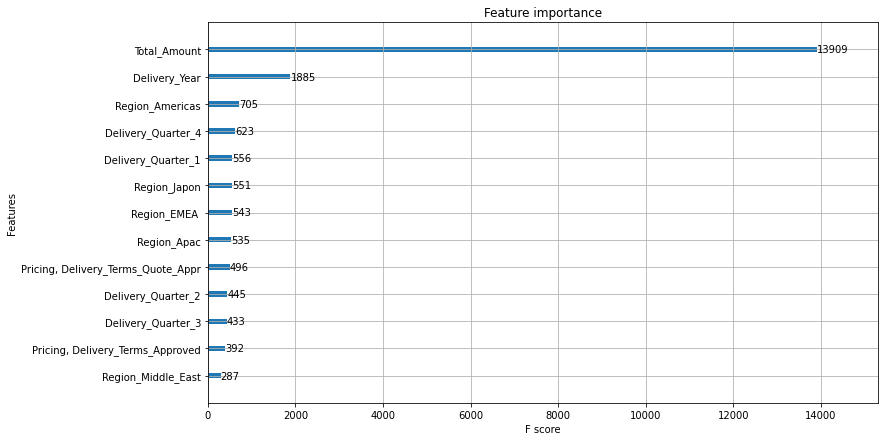

In [ ]:
plt.rcParams['figure.figsize'] = [12, 7]
xgb.plot_importance(xg_Regressor2)

##Adaboost

###Xgboost

In [ ]:
ada = AdaBoostRegressor(xg_Regressor2, learning_rate = 0.001)

In [ ]:
ada.fit(x_train6,y_train6)

In [ ]:
predsadaregressor1 = ada.predict(x_test6)

In [ ]:
value_pred_Regressor2 = pd.DataFrame()
value_pred_Regressor2['pred'] = predsadaregressor1
value_pred_Regressor2['pred'].value_counts()

0.049680    24
0.049988    23
0.951860    18
0.952839    16
0.950555    15
            ..
0.654893     1
0.068190     1
0.623641     1
0.090952     1
0.707031     1
Name: pred, Length: 2667, dtype: int64

In [ ]:
rmseAdaRegressor1 = np.sqrt(mean_squared_error(y_test6, predsadaregressor1))
print("RMSE: %f" % (rmseAdaRegressor1))

RMSE: 0.353760


In [ ]:
lossAdaRegressor1 = log_loss(y_test6, predsadaregressor1)
print(f"Log Loss is {lossAdaRegressor1}")

Log Loss is 0.3976688472759506


###Catbooost

In [ ]:
ada2 = AdaBoostRegressor(modelCatReg2,learning_rate = 0.001)

In [ ]:
ada2.fit(x_train6,y_train6)

In [ ]:
predsadaregressor2 = ada2.predict(x_test6)

###LightGBM

In [ ]:
ada3 = AdaBoostRegressor(modelLGBMReg2, learning_rate = 0.001 )

In [ ]:
ada3.fit(x_train6,y_train6)

AdaBoostRegressor(base_estimator=LGBMRegressor(boosting_type='goss',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.001,
                                               max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=400, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=123, reg_alpha=0.0,
                                               reg_lambda=0.0, silent=True,
                                               subsample=1.0,
                

In [ ]:
predsadaregressor3 = ada3.predict(x_test6)

###VotingRegressor de los 3 modelos

In [ ]:
vot_3modelos_reg = VotingRegressor([('xgb',ada), ('catb',ada2)])

In [ ]:
vot_3modelos_reg.fit(x_train6,y_train6)

Streaming output truncated to the last 5000 lines.
1000:	learn: 0.2647123	total: 10.1s	remaining: 5.02s
1001:	learn: 0.2646845	total: 10.1s	remaining: 5.01s
1002:	learn: 0.2646572	total: 10.1s	remaining: 5s
1003:	learn: 0.2645877	total: 10.1s	remaining: 4.99s
1004:	learn: 0.2645728	total: 10.1s	remaining: 4.98s
1005:	learn: 0.2645229	total: 10.1s	remaining: 4.97s
1006:	learn: 0.2644730	total: 10.1s	remaining: 4.96s
1007:	learn: 0.2644520	total: 10.1s	remaining: 4.95s
1008:	learn: 0.2644505	total: 10.1s	remaining: 4.93s
1009:	learn: 0.2644031	total: 10.1s	remaining: 4.92s
1010:	learn: 0.2643486	total: 10.2s	remaining: 4.91s
1011:	learn: 0.2643124	total: 10.2s	remaining: 4.9s
1012:	learn: 0.2642544	total: 10.2s	remaining: 4.89s
1013:	learn: 0.2642243	total: 10.2s	remaining: 4.88s
1014:	learn: 0.2641780	total: 10.2s	remaining: 4.87s
1015:	learn: 0.2641291	total: 10.2s	remaining: 4.86s
1016:	learn: 0.2641042	total: 10.2s	remaining: 4.85s
1017:	learn: 0.2640205	total: 10.2s	remaining: 4.84s

VotingRegressor(estimators=[('xgb',
                             AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5,
                                                                           booster='gbtree',
                                                                           colsample_bylevel=1,
                                                                           colsample_bynode=1,
                                                                           colsample_bytree=0.8,
                                                                           gamma=1.5,
                                                                           importance_type='gain',
                                                                           learning_rate=0.01,
                                                                           max_delta_step=0,
                                                                           max_depth=20,
                              

In [ ]:
preds_vot_3mod = vot_3modelos_reg.predict(x_test6)

In [ ]:
value_pred_vot_Regressor3_mod = pd.DataFrame()
value_pred_vot_Regressor3_mod['pred'] = preds_vot_3mod
value_pred_vot_Regressor3_mod['pred'].value_counts()

In [ ]:
rmseRegressorvot_3mod = np.sqrt(mean_squared_error(y_test6, preds_vot_3mod))
print("RMSE: %f" % (rmseRegressorvot_3mod))

In [ ]:
lossRegressorvot_3mod = log_loss(y_test6, preds_vot_3mod)
print(f"Log Loss is {lossRegressorvot_3mod}")

##Plots


In [ ]:
!pip install shap
import shap
shap.initjs()

     |████████████████████████████████| 358kB 5.2MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490506 sha256=6a452fbbf0bf1fb8acbba3f620848ad151acb71557063bf314ddfc94e3dee0b7
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/shap-0.38.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/slicer-0.0.7.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192

In [ ]:
from matplotlib.pylab import rcParams

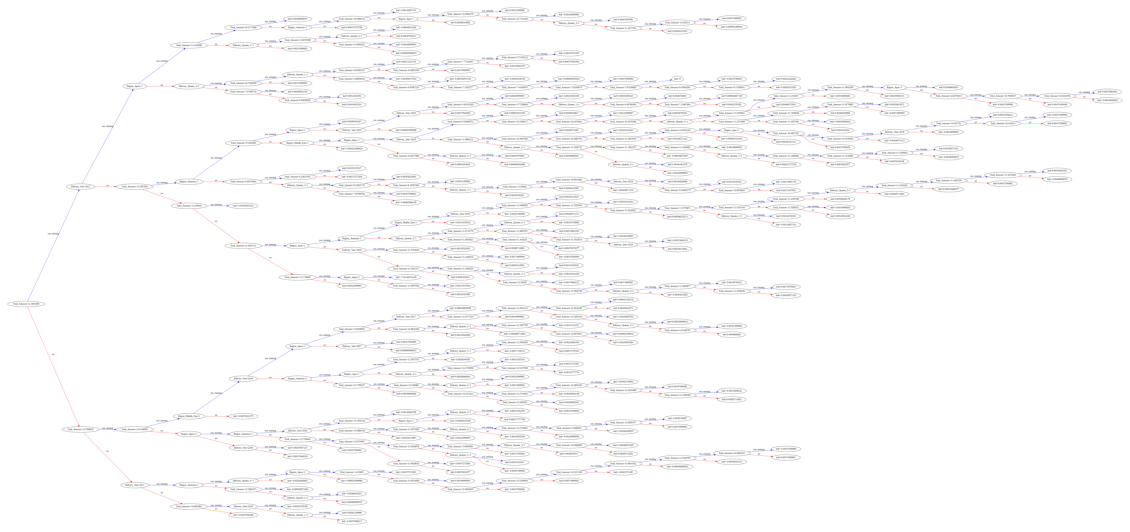

In [ ]:
plot_tree(xg_Regressor2, rankdir='LR')
rcParams['figure.figsize'] = 200,100
plt.show()

In [ ]:
shap.initjs()
shap_values = modelCatReg2.get_feature_importance(Pool(DataFrame3Train, DataFrame3Test), type='ShapValues')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

#Primeras predicciones del modelo
shap.force_plot(expected_value, shap_values[0,:], DataFrame3Train.iloc[0,:])

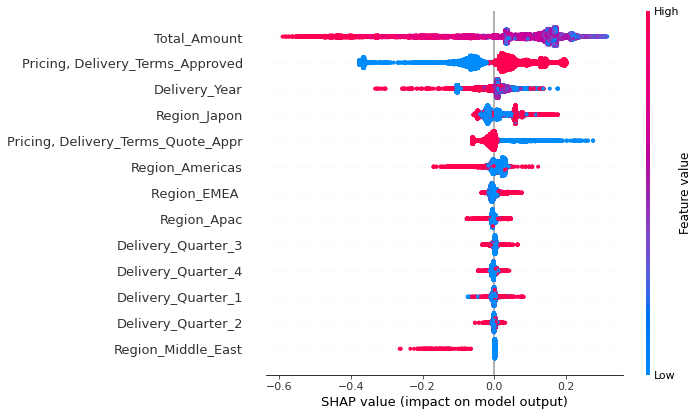

In [ ]:
shap.initjs()
# summarize the effects of all the features
shap.summary_plot(shap_values,DataFrame3Train )

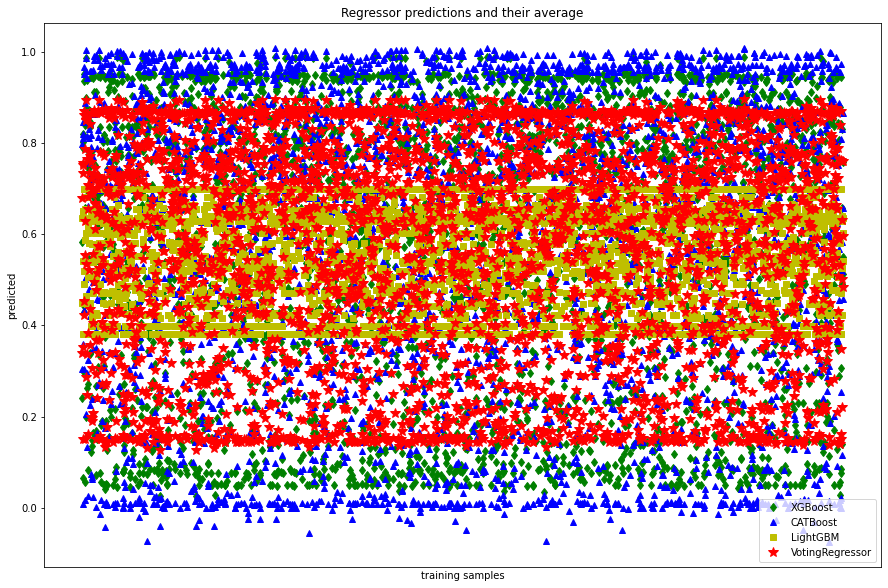

In [ ]:
rcParams['figure.figsize'] = 15,10

plt.plot(predsadaregressor1, 'gd', label='XGBoost')
plt.plot(predsadaregressor2, 'b^', label='CATBoost')
plt.plot(predsadaregressor3, 'ys', label='LightGBM')
plt.plot(preds_vot_3mod, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')


plt.show()

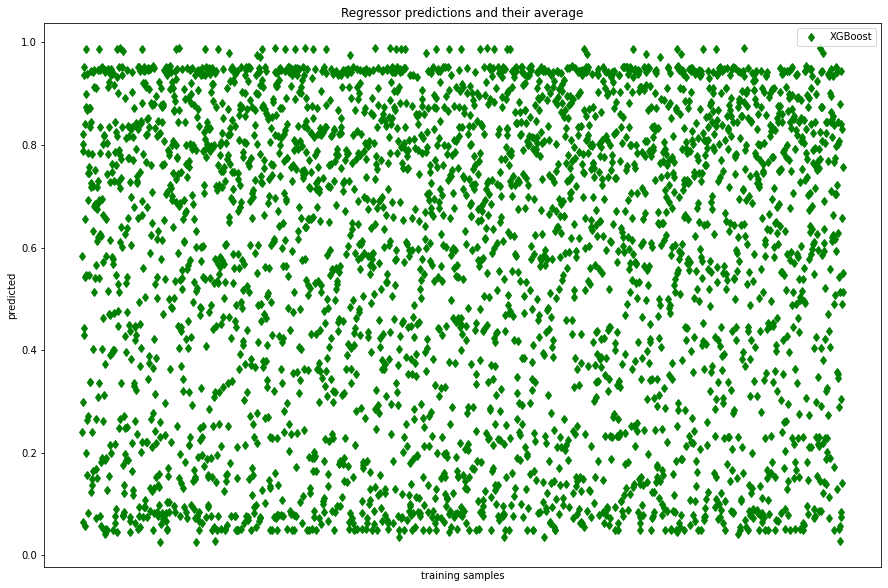

In [ ]:
rcParams['figure.figsize'] = 15,10

plt.plot(predsadaregressor1, 'gd', label='XGBoost')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')


plt.show()

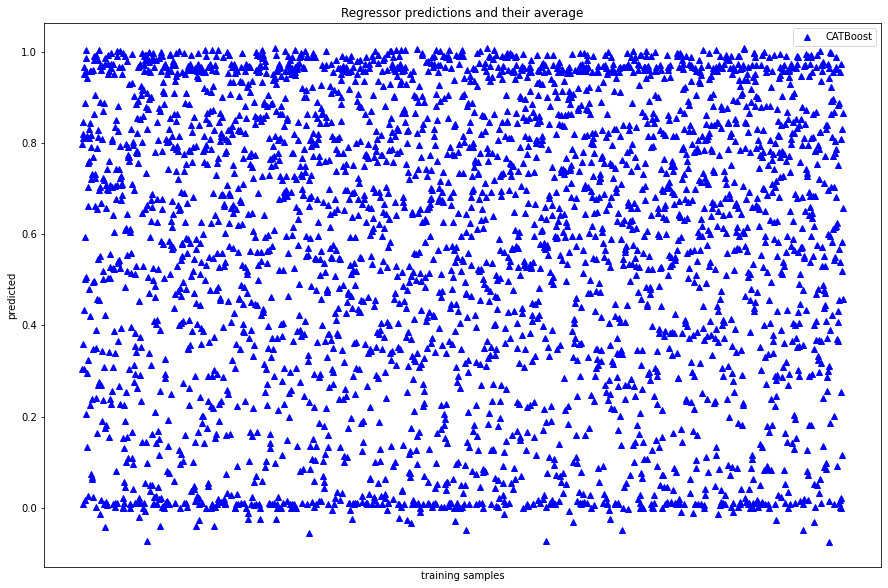

In [ ]:
rcParams['figure.figsize'] = 15,10

plt.plot(predsadaregressor2, 'b^', label='CATBoost')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')


plt.show()

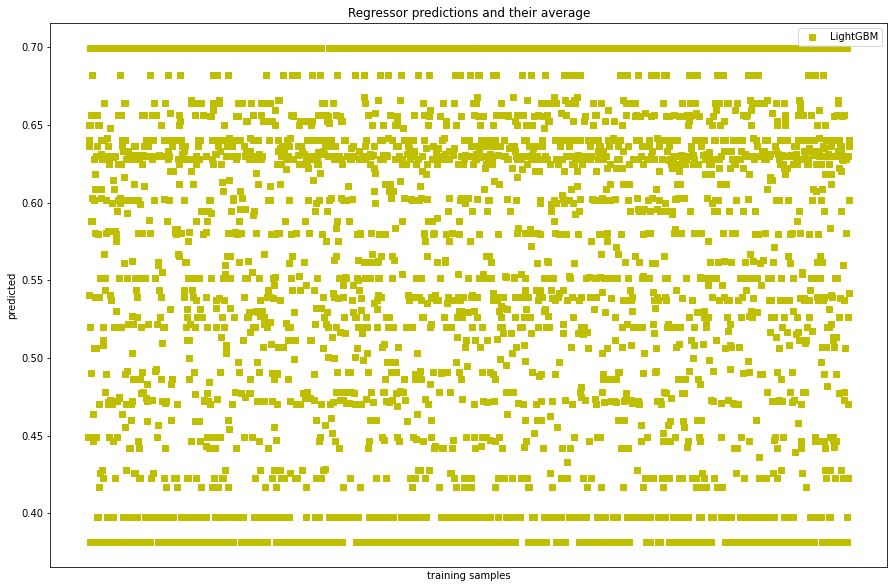

In [ ]:
rcParams['figure.figsize'] = 15,10

plt.plot(predsadaregressor3, 'ys', label='LightGBM')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')


plt.show()

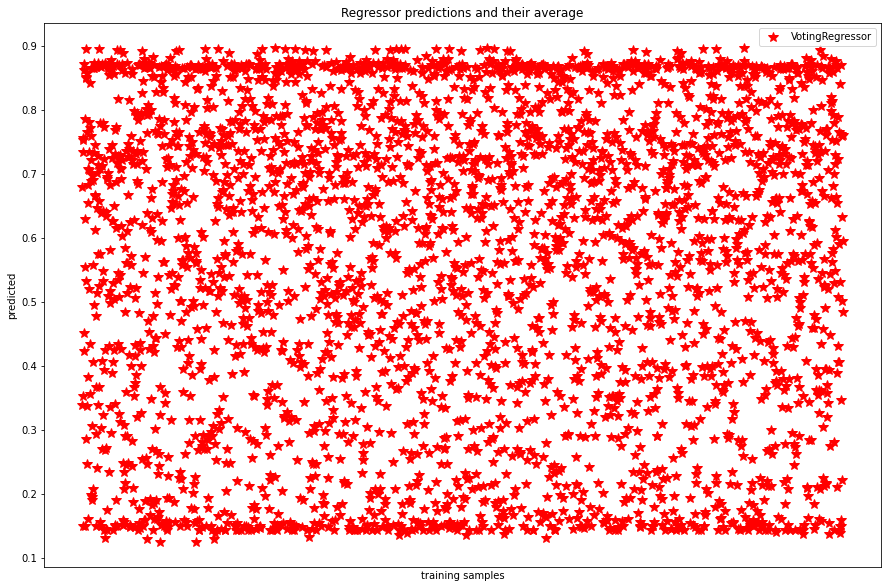

In [ ]:
rcParams['figure.figsize'] = 15,10

plt.plot(preds_vot_3mod, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')


plt.show()

##Test

In [ ]:
DataFrameTest3 = pd.read_csv('/content/DataFrame_test_encoded1.csv')

In [ ]:
DataFrameTest3.head()

In [ ]:
DataFrameTest3.drop(columns = {'Unnamed: 0'}, inplace = True)

In [ ]:
DataFrameTest3.head()

In [ ]:
DescargaPredVotRegressor2 = pd.DataFrame()
DescargaPredVotRegressor2['Opportunity_ID'] = DataFrameTest3['Opportunity_ID']
DescargaPredVotRegressor2.set_index('Opportunity_ID', inplace = True)

In [ ]:
DataFrameTest3 = DataFrameTest3.drop(columns={'Opportunity_ID'})
DataFrameTest3.head()

In [ ]:
predvotTest2 = vot_3modelos_reg.predict(DataFrameTest3)

In [ ]:
DescargaPredVotRegressor2['target'] = predvotTest2
DescargaPredVotRegressor2

In [ ]:
DescargaPredVotRegressor2['target'].describe()

count    1567.000000
mean        0.464172
std         0.241585
min        -0.150550
25%         0.277256
50%         0.480208
75%         0.644449
max         0.986908
Name: target, dtype: float64

In [ ]:
csv4 = DescargaPredVotRegressor2.to_csv('vot_regression_pred2.csv')
files.download('vot_regression_pred2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##GridSearch

###Catboost

In [ ]:
#modelCatReggrid = CatBoostRegressor(learning_rate = 0.0075, verbose = True, random_seed = 123, loss_function = "RMSE", num_boost_round = 150, max_depth = 16)

In [ ]:
modelcat = CatBoostRegressor()

grid = {'learning_rate': [0.1, 0.01,0.001, 0.009],
        'max_depth': [6, 10, 16,20],
        'l2_leaf_reg': [None,2,10,20,30],
        'num_boost_round':[1500]}

grid_search_cat_result = modelcat.grid_search(grid, 
                                       X=x_train6, 
                                       y=y_train6, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.3588942943
bestIteration = 987

0:	loss: 0.3588943	best: 0.3588943 (0)	total: 2.87s	remaining: 3m 47s

bestTest = 0.3688506894
bestIteration = 999

1:	loss: 0.3688507	best: 0.3588943 (0)	total: 5.33s	remaining: 3m 27s

bestTest = 0.4581745931
bestIteration = 999

2:	loss: 0.4581746	best: 0.3588943 (0)	total: 7.8s	remaining: 3m 20s

bestTest = 0.3695724158
bestIteration = 999

3:	loss: 0.3695724	best: 0.3588943 (0)	total: 10.3s	remaining: 3m 15s

bestTest = 0.3595399006
bestIteration = 999

4:	loss: 0.3595399	best: 0.3588943 (0)	total: 12.8s	remaining: 3m 11s

bestTest = 0.3698905993
bestIteration = 999

5:	loss: 0.3698906	best: 0.3588943 (0)	total: 15.2s	remaining: 3m 7s

bestTest = 0.4604335019
bestIteration = 999

6:	loss: 0.4604335	best: 0.3588943 (0)	total: 17.7s	remaining: 3m 4s

bestTest = 0.3704788341
bestIteration = 999

7:	loss: 0.3704788	best: 0.3588943 (0)	total: 20.2s	remaining: 3m 1s

bestTest = 0.3606923313
bestIteration = 987

8:	loss: 0.3606923	best: 0.358

In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid_search_cat_result.best_params_, ":", grid_search_cat_result.best_score_, grid_search_cat_result.scoring)

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

#Tercer DataFrame

In [ ]:
short_df = pd.read_csv( "/content/short_df_train_encoded_4.csv" )

In [ ]:
short_df.head()

Opportunity_ID  Total_Amount  ...  Opportunity_Owner  Decision
0               0     15.635076  ...           0.560776         0
1               1     10.940740  ...           0.750000         1
2              19     12.624960  ...           0.261905         0
3              20     11.702880  ...           0.664537         1
4              23     12.433069  ...           0.560776         1

[5 rows x 7 columns]

In [ ]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(
                                        short_df.drop(columns = 'Decision'),
                                        short_df['Decision'],
                                        random_state = 123
                                    )

In [ ]:
X_train7.shape, X_test7.shape, y_train7.shape, y_test7.shape

((10187, 6), (3396, 6), (10187,), (3396,))

##Catboost

In [ ]:
#modelCatReg3 = CatBoostRegressor(learning_rate = 0.0075, verbose = True, random_seed = 123, loss_function = "RMSE", num_boost_round = 1500, max_depth = 16)
modelCatReg3 = CatBoostRegressor(num_boost_round = 1500, learning_rate = 0.009)

In [ ]:
modelCatReg3.fit(X_train7, y_train7)

0:	learn: 0.4956229	total: 1.38s	remaining: 34m 32s
1:	learn: 0.4941426	total: 2.13s	remaining: 26m 39s
2:	learn: 0.4926921	total: 2.87s	remaining: 23m 51s
3:	learn: 0.4912821	total: 3.59s	remaining: 22m 21s
4:	learn: 0.4899263	total: 4.33s	remaining: 21m 33s
5:	learn: 0.4885555	total: 5.04s	remaining: 20m 53s
6:	learn: 0.4872137	total: 5.79s	remaining: 20m 34s
7:	learn: 0.4858374	total: 6.53s	remaining: 20m 17s
8:	learn: 0.4845138	total: 7.19s	remaining: 19m 51s
9:	learn: 0.4831716	total: 7.94s	remaining: 19m 43s
10:	learn: 0.4818197	total: 8.67s	remaining: 19m 33s
11:	learn: 0.4805117	total: 9.42s	remaining: 19m 28s
12:	learn: 0.4792103	total: 10.2s	remaining: 19m 21s
13:	learn: 0.4779420	total: 10.9s	remaining: 19m 12s
14:	learn: 0.4767076	total: 11.5s	remaining: 19m 1s
15:	learn: 0.4755061	total: 12.3s	remaining: 18m 57s
16:	learn: 0.4742706	total: 13s	remaining: 18m 53s
17:	learn: 0.4730196	total: 13.7s	remaining: 18m 51s
18:	learn: 0.4717998	total: 14.5s	remaining: 18m 47s
19:	le

In [ ]:
preds_CatReg3 = modelCatReg3.predict(X_test7)

In [ ]:
#Error del modelo
rmsecat3 = np.sqrt(mean_squared_error(y_test7, preds_CatReg3))
print("RMSE: %f" % (rmsecat3))

RMSE: 0.358687


In [ ]:
losscat3 = log_loss(y_test7, preds_CatReg3)
losscat3

0.4572596287410401

##Lightgbm


In [ ]:
lgbm3 = LGBMRegressor(boosting_type = "goss", n_estimators = 700, learning_rate = 0.1, random_state = 123)

In [ ]:
lgbm3.fit(X_train7, y_train7)

In [ ]:
predslgbm3 = lgbm3.predict(X_test7)

In [ ]:
value_pred_lgbm_Regressor3 = pd.DataFrame()
value_pred_lgbm_Regressor3['pred'] = predslgbm3
value_pred_lgbm_Regressor3['pred'].describe()

In [ ]:
rmselgbmRegressor3 = np.sqrt(mean_squared_error(y_test7, predslgbm3))
print("RMSE: %f" % (rmselgbmRegressor3))

In [ ]:
losslgbmRegressor3 = log_loss(y_test7, predslgbm3)
print(f"Log Loss is {losslgbmRegressor3}")

##Xgboost

In [ ]:
#xg_Regressor3 = xgb.XGBRegressor(colsample_bytree= 0.8, gamma= 1.5, learning_rate= 0.001, max_depth= 20, min_child_weight= 1, n_estimators= 200, subsample= 0.8)
xg_Regressor3 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree= 0.8, gamma= 1.5, learning_rate= 0.01, max_depth= 20, min_child_weight= 1, n_estimators= 280, subsample= 0.8)

In [ ]:
xg_Regressor3.fit(X_train7, y_train7)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=280,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

In [ ]:
predsRegressor3 = xg_Regressor3.predict(X_test7)

In [ ]:
value_pred_Regressor3 = pd.DataFrame()
value_pred_Regressor3['pred'] = predsRegressor3
value_pred_Regressor3['pred'].value_counts()

0.116762    11
0.079817    10
0.818665     9
0.194791     8
0.157607     8
            ..
0.916614     1
0.286432     1
0.274711     1
0.943952     1
0.828589     1
Name: pred, Length: 3104, dtype: int64

In [ ]:
rmseRegressor3 = np.sqrt(mean_squared_error(y_test7, predsRegressor3))
print("RMSE: %f" % (rmseRegressor3))

RMSE: 0.450791


In [ ]:
lossRegressor3 = log_loss(y_test7, predsRegressor3)
print(f"Log Loss is {lossRegressor3}")

Log Loss is 0.5985710743476842


###Plot

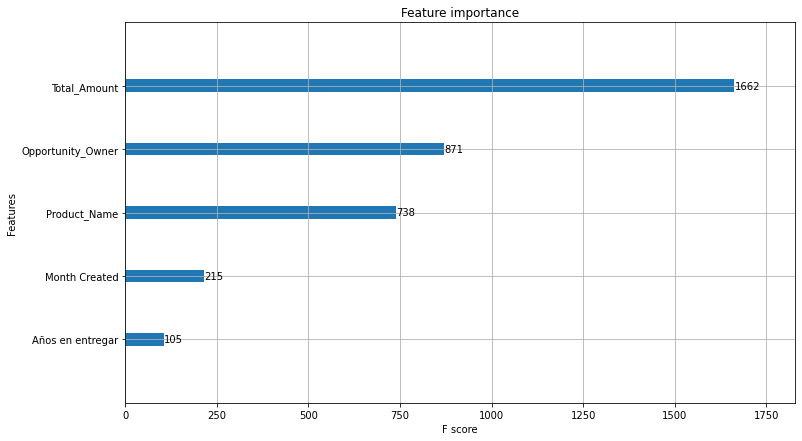

In [ ]:
plt.rcParams['figure.figsize'] = [12, 7]
xgb.plot_importance(xg_Regressor3)

##Adaboost

###Xgboost

In [ ]:
adaxg2 = AdaBoostRegressor(xg_Regressor3, learning_rate = 0.001)

In [ ]:
adaxg2.fit(X_train7,y_train7)

AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.8, gamma=1.5,
                                              importance_type='gain',
                                              learning_rate=0.01,
                                              max_delta_step=0, max_depth=20,
                                              min_child_weight=1, missing=None,
                                              n_estimators=280, n_jobs=1,
                                              nthread=None,
                                              objective='reg:squarederror',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              see

In [ ]:
predsadaregressor4 = adaxg2.predict(X_test7)

In [ ]:
value_pred_Regressor3 = pd.DataFrame()
value_pred_Regressor3['pred'] = predsadaregressor4
value_pred_Regressor3['pred'].value_counts()

0.111141    11
0.082963    10
0.813359     9
0.191164     8
0.157083     7
            ..
0.861961     1
0.708512     1
0.549459     1
0.787739     1
0.392579     1
Name: pred, Length: 3147, dtype: int64

In [ ]:
rmseAdaRegressor2 = np.sqrt(mean_squared_error(y_test7, predsadaregressor4))
print("RMSE: %f" % (rmseAdaRegressor2))

RMSE: 0.357545


In [ ]:
lossAdaRegressor2 = log_loss(y_test7, predsadaregressor4)
print(f"Log Loss is {lossAdaRegressor2}")

Log Loss is 0.4077229706984062


###Catboost

In [ ]:
adacat2 = AdaBoostRegressor(modelCatReg3,learning_rate = 0.001)

In [ ]:
adacat2.fit(X_train7,y_train7)

Se han truncado las últimas 5000 líneas del flujo de salida.
1000:	learn: 0.3651456	total: 3.91s	remaining: 1.95s
1001:	learn: 0.3651073	total: 3.91s	remaining: 1.94s
1002:	learn: 0.3650729	total: 3.91s	remaining: 1.94s
1003:	learn: 0.3650546	total: 3.92s	remaining: 1.94s
1004:	learn: 0.3650429	total: 3.92s	remaining: 1.93s
1005:	learn: 0.3650178	total: 3.93s	remaining: 1.93s
1006:	learn: 0.3649805	total: 3.94s	remaining: 1.93s
1007:	learn: 0.3649462	total: 3.94s	remaining: 1.92s
1008:	learn: 0.3649312	total: 3.94s	remaining: 1.92s
1009:	learn: 0.3649167	total: 3.94s	remaining: 1.91s
1010:	learn: 0.3648970	total: 3.95s	remaining: 1.91s
1011:	learn: 0.3648680	total: 3.95s	remaining: 1.91s
1012:	learn: 0.3648502	total: 3.95s	remaining: 1.9s
1013:	learn: 0.3648168	total: 3.96s	remaining: 1.9s
1014:	learn: 0.3647818	total: 3.96s	remaining: 1.89s
1015:	learn: 0.3647423	total: 3.96s	remaining: 1.89s
1016:	learn: 0.3647232	total: 3.97s	remaining: 1.88s
1017:	learn: 0.3647130	total: 3.97s	rema

AdaBoostRegressor(base_estimator=<catboost.core.CatBoostRegressor object at 0x7f15f4eefb50>,
                  learning_rate=0.001, loss='linear', n_estimators=50,
                  random_state=None)

In [ ]:
predsadaregressor5 = adacat2.predict(X_test7)

In [ ]:
value_pred_Regressor3 = pd.DataFrame()
value_pred_Regressor3['pred'] = predsadaregressor5
value_pred_Regressor3['pred'].value_counts()

0.158683    11
0.600896     9
0.087154     8
0.643783     7
0.384786     5
            ..
0.266125     1
0.757941     1
0.112734     1
0.786477     1
0.874504     1
Name: pred, Length: 3157, dtype: int64

In [ ]:
rmseAdaRegressor3 = np.sqrt(mean_squared_error(y_test7, predsadaregressor5))
print("RMSE: %f" % (rmseAdaRegressor3))

RMSE: 0.373458


In [ ]:
lossAdaRegressor3 = log_loss(y_test7, predsadaregressor5)
print(f"Log Loss is {lossAdaRegressor3}")

Log Loss is 0.44075597780725856


###Lightgbm

In [ ]:
adalgbm2 = AdaBoostRegressor(lgbm3,learning_rate = 0.001)

##VotingRegressor

In [ ]:
reg3 = adaxg2

In [ ]:
reg4 = adacat2

In [ ]:
#reg5 = modelLGBMReg3

In [ ]:
vot_reg_ada2 = VotingRegressor([('xg',reg3),('cat',reg4)])

In [ ]:
vot_reg_ada2.fit(X_train7,y_train7)

Se han truncado las últimas 5000 líneas del flujo de salida.
1000:	learn: 0.3626356	total: 3.53s	remaining: 1.76s
1001:	learn: 0.3626026	total: 3.53s	remaining: 1.75s
1002:	learn: 0.3625783	total: 3.53s	remaining: 1.75s
1003:	learn: 0.3625401	total: 3.54s	remaining: 1.75s
1004:	learn: 0.3624932	total: 3.54s	remaining: 1.74s
1005:	learn: 0.3624467	total: 3.54s	remaining: 1.74s
1006:	learn: 0.3624069	total: 3.55s	remaining: 1.74s
1007:	learn: 0.3623809	total: 3.55s	remaining: 1.73s
1008:	learn: 0.3623633	total: 3.55s	remaining: 1.73s
1009:	learn: 0.3623393	total: 3.56s	remaining: 1.73s
1010:	learn: 0.3623164	total: 3.56s	remaining: 1.72s
1011:	learn: 0.3622718	total: 3.56s	remaining: 1.72s
1012:	learn: 0.3622482	total: 3.56s	remaining: 1.71s
1013:	learn: 0.3622161	total: 3.57s	remaining: 1.71s
1014:	learn: 0.3622020	total: 3.57s	remaining: 1.71s
1015:	learn: 0.3621722	total: 3.58s	remaining: 1.7s
1016:	learn: 0.3621297	total: 3.58s	remaining: 1.7s
1017:	learn: 0.3621076	total: 3.59s	rema

VotingRegressor(estimators=[('xg',
                             AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5,
                                                                           booster='gbtree',
                                                                           colsample_bylevel=1,
                                                                           colsample_bynode=1,
                                                                           colsample_bytree=0.8,
                                                                           gamma=1.5,
                                                                           importance_type='gain',
                                                                           learning_rate=0.01,
                                                                           max_delta_step=0,
                                                                           max_depth=20,
                               

In [ ]:
preds_vot_ada2 = vot_reg_ada2.predict(X_test7)

In [ ]:
value_pred_vot_Regressor2 = pd.DataFrame()
value_pred_vot_Regressor2['pred'] = preds_vot_ada2
value_pred_vot_Regressor2['pred'].value_counts()

0.127278    11
0.718421     8
0.280880     7
0.914962     6
0.085419     6
            ..
0.866605     1
0.301391     1
0.856046     1
0.940479     1
0.606908     1
Name: pred, Length: 3175, dtype: int64

In [ ]:
rmseRegressorvot2 = np.sqrt(mean_squared_error(y_test7, preds_vot_ada2))
print("RMSE: %f" % (rmseRegressorvot2))

RMSE: 0.363672


In [ ]:
lossRegressorvot2 = log_loss(y_test7, preds_vot_ada2)
print(f"Log Loss is {lossRegressorvot2}")

Log Loss is 0.41587614917162


##Test

In [ ]:
df_test = pd.read_csv( "/content/short_df_test_encoded_4.csv" )
df_test.head()

Opportunity_ID  Total_Amount  ...  Product_Name  Opportunity_Owner
0           10689     12.153836  ...      0.445844           0.664537
1           10690     12.559301  ...      0.445844           0.664537
2           10715     10.057361  ...      0.810778           0.472141
3           10716      8.836316  ...      0.800000           0.472141
4           10719     11.193940  ...      0.752351           0.292237

[5 rows x 6 columns]

In [ ]:
predCat_test = adacat2.predict(df_test)

In [ ]:
predXgboost_test = adaxg2.predict(df_test)

In [ ]:
predvot2_test = vot_reg_ada2.predict(df_test)

In [ ]:
subirvot = pd.DataFrame()
subirvot['Opportunity_ID'] = df_test.reset_index()['Opportunity_ID']
subirvot['target'] = predCat_test
subirvot.sort_values('Opportunity_ID',inplace = True)
subirvot = subirvot.drop_duplicates('Opportunity_ID',keep = 'last')
subirvot.set_index('Opportunity_ID', inplace = True)
subirvot

target
Opportunity_ID          
10689           0.631611
10690           0.615390
10691           0.599672
10692           0.612555
10693           0.989842
...                  ...
12364           0.995525
12365           0.475824
12366           0.344783
12367           0.321008
12368           0.285809

[1567 rows x 1 columns]

In [ ]:
subirvot.describe()

target
count  1567.000000
mean      0.585619
std       0.240791
min       0.051041
25%       0.358558
50%       0.607204
75%       0.788454
max       1.040025

In [ ]:
csv8 = subirvot.to_csv('vot_pred2.csv')
files.download('vot_pred2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##GridSearch

In [ ]:
#modelCatReggrid = CatBoostRegressor(learning_rate = 0.0075, verbose = True, random_seed = 123, loss_function = "RMSE", num_boost_round = 150, max_depth = 16)

In [ ]:
"""
model = CatBoostRegressor()

grid = {'learning_rate': [0.1, 0.01,0.001],
        'max_depth': [6, 10, 16,20],
        'l2_leaf_reg': [None,2,10,20,30]}

grid_search_result = model.grid_search(grid, 
                                       X=X_train7, 
                                       y=y_train7, 
                                       plot=True)

SyntaxError: ignored

In [ ]:
#grid_search_result

#CuartoDataFrame

##Df

In [ ]:
x_train_timeSeries = pd.read_csv( "/content/X_train_timeSeries.csv" )
x_test_timeSeries = pd.read_csv( "/content/X_test_timeSeries.csv" )
y_train_timeSeries = pd.read_csv( "/content/y_train_timeSeries.csv" )
y_test_timeSeries = pd.read_csv( "/content/y_test_timeSeries.csv" )

In [ ]:
x_train_timeSeries.drop(columns = {'Unnamed: 0'}, inplace = True)
x_train_timeSeries

Region  Total_Amount  ...     Lag_1     Delta
0      0.532255      2.773332  ...  0.000000  3.088401
1      0.532255      2.740425  ...  2.585640  2.098247
2      0.532255      2.999379  ...  2.545803  2.583974
3      0.587888      2.780462  ...  2.852610  1.552569
4      0.587888      2.647444  ...  0.000000  3.019307
...         ...           ...  ...       ...       ...
10861  0.587888      2.817755  ...  2.441786  2.357726
10862  0.587888      2.793234  ...  2.441786  2.357726
10863  0.587888      2.541749  ...  2.441786  2.357726
10864  0.587888      2.772403  ...  2.441786  2.357726
10865  0.587888      2.754085  ...  2.441786  2.357726

[10866 rows x 12 columns]

In [ ]:
x_test_timeSeries.drop(columns = {'Unnamed: 0'}, inplace = True)
x_test_timeSeries

Region  Total_Amount  ...     Lag_1     Delta
0     0.587888      2.791738  ...  2.441786  2.357726
1     0.587888      2.647007  ...  2.594527  2.057823
2     0.587888      2.600993  ...  2.594527  2.057823
3     0.587888      2.747616  ...  2.594527  2.057823
4     0.587888      2.819667  ...  2.594527  2.057823
...        ...           ...  ...       ...       ...
2711  0.466840      2.845924  ...  2.740744  2.097463
2712  0.466840      2.819796  ...  2.740744  2.097463
2713  0.466840      2.845924  ...  2.740744  2.097463
2714  0.466840      3.032890  ...  2.740744  2.097463
2715  0.466840      3.048446  ...  2.740744  2.097463

[2716 rows x 12 columns]

In [ ]:
y_train_timeSeries.drop(columns = {'Unnamed: 0'}, inplace = True)
y_train_timeSeries

Decision
0             0
1             0
2             0
3             0
4             1
...         ...
10861         0
10862         0
10863         1
10864         1
10865         1

[10866 rows x 1 columns]

In [ ]:
y_test_timeSeries.drop(columns = {'Unnamed: 0'}, inplace = True)
y_test_timeSeries

Decision
0            0
1            1
2            1
3            1
4            1
...        ...
2711         1
2712         1
2713         1
2714         0
2715         0

[2716 rows x 1 columns]

##LightGbm

##Xgboost

In [ ]:
xg_Regressor4 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree= 0.8, gamma= 1.5, learning_rate= 0.01, max_depth= 20, min_child_weight= 1, n_estimators= 280, subsample= 0.8)

##Catboost

In [ ]:
modelCatReg4 = CatBoostRegressor(num_boost_round = 1500, learning_rate = 0.009)

##Ada

###XGB

In [ ]:
adaxg4 = AdaBoostRegressor(xg_Regressor4, learning_rate = 0.001)

###Cat

In [ ]:
adacat4 = AdaBoostRegressor(modelCatReg4,learning_rate = 0.001)

###Voting

In [ ]:
#XGBoost
regxgb4 = adaxg4
#CATBoost
regcat4 = adacat4

In [ ]:
Vot_reg_4 = VotingRegressor([('xg',regxgb4),('cat',regcat4)])

In [ ]:
Vot_reg_4.fit(x_train_timeSeries,y_train_timeSeries)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Se han truncado las últimas 5000 líneas del flujo de salida.
1000:	learn: 0.3363062	total: 4.78s	remaining: 2.38s
1001:	learn: 0.3362641	total: 4.79s	remaining: 2.38s
1002:	learn: 0.3362406	total: 4.79s	remaining: 2.38s
1003:	learn: 0.3362208	total: 4.8s	remaining: 2.37s
1004:	learn: 0.3362118	total: 4.8s	remaining: 2.36s
1005:	learn: 0.3361688	total: 4.8s	remaining: 2.36s
1006:	learn: 0.3361389	total: 4.81s	remaining: 2.35s
1007:	learn: 0.3361105	total: 4.81s	remaining: 2.35s
1008:	learn: 0.3360887	total: 4.82s	remaining: 2.34s
1009:	learn: 0.3360594	total: 4.82s	remaining: 2.34s
1010:	learn: 0.3360074	total: 4.83s	remaining: 2.33s
1011:	learn: 0.3359657	total: 4.83s	remaining: 2.33s
1012:	learn: 0.3359440	total: 4.84s	remaining: 2.33s
1013:	learn: 0.3358825	total: 4.84s	remaining: 2.32s
1014:	learn: 0.3358531	total: 4.85s	remaining: 2.32s
1015:	learn: 0.3358274	total: 4.85s	remaining: 2.31s
1016:	learn: 0.3357832	total: 4.86s	remaining: 2.31s
1017:	learn: 0.3357490	total: 4.86s	remai

VotingRegressor(estimators=[('xg',
                             AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5,
                                                                           booster='gbtree',
                                                                           colsample_bylevel=1,
                                                                           colsample_bynode=1,
                                                                           colsample_bytree=0.8,
                                                                           gamma=1.5,
                                                                           importance_type='gain',
                                                                           learning_rate=0.01,
                                                                           max_delta_step=0,
                                                                           max_depth=20,
                               

In [ ]:
preds_vot_reg4 = Vot_reg_4.predict(x_test_timeSeries)

In [ ]:
value_pred_vot_Regressor4 = pd.DataFrame()
value_pred_vot_Regressor4['pred'] = preds_vot_reg4
value_pred_vot_Regressor4['pred'].value_counts()

0.773741    32
0.576742    15
0.523958    13
0.375459    12
0.557437    12
            ..
0.111014     1
0.687203     1
0.056016     1
0.098595     1
0.693124     1
Name: pred, Length: 2128, dtype: int64

In [ ]:
rmseRegressorvot4 = np.sqrt(mean_squared_error(y_test_timeSeries, preds_vot_reg4))
print("RMSE: %f" % (rmseRegressorvot4))

RMSE: 0.419890


In [ ]:
lossRegressorvot4 = log_loss(y_test_timeSeries, preds_vot_reg4)
print(f"Log Loss is {lossRegressorvot4}")

Log Loss is 0.5304058555817228


##Test

In [ ]:
df_test_timeseries = pd.read_csv( "/content/Kaggle_test_timeSeries.csv" )
df_test_timeseries.drop(columns = {'Unnamed: 0'}, inplace = True)
df_test_timeseries.head()

Region  Total_Amount  ...  Lag_1      Delta
0  0.532255     12.087389  ...    0.0  11.000704
1  0.532255     10.325097  ...    0.0  11.000704
2  0.532255     11.479095  ...    0.0  11.000704
3  0.532255     10.155219  ...    0.0  11.000704
4  0.532255      9.975017  ...    0.0  11.000704

[5 rows x 12 columns]

In [ ]:
predvot4_test = Vot_reg_4.predict(df_test_timeseries)

In [ ]:
predvot4_test

array([0.33482281, 0.3276005 , 0.32482537, ..., 0.14160307, 0.23069619,
       0.21946777])

In [ ]:
subirvot4 = pd.DataFrame()
subirvot4['Opportunity_ID'] = df_test.reset_index()['Opportunity_ID']
subirvot4['target'] = predvot4_test
subirvot4.sort_values('Opportunity_ID',inplace = True)
subirvot4 = subirvot4.drop_duplicates('Opportunity_ID',keep = 'last')
subirvot4.set_index('Opportunity_ID', inplace = True)
subirvot4

target
Opportunity_ID          
10689           0.334823
10690           0.327601
10691           0.190576
10692           0.237429
10693           0.231580
...                  ...
12364           0.252066
12365           0.299157
12366           0.345404
12367           0.325570
12368           0.263235

[1567 rows x 1 columns]

In [ ]:
subirvot4.describe()

target
count  1567.000000
mean      0.295756
std       0.098740
min       0.052624
25%       0.222734
50%       0.289467
75%       0.342859
max       0.593532

In [ ]:
csv10 = subirvot4.to_csv('vot_pred4.csv')
files.download('vot_pred4.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>